**<center> <span style="color:#0F52BA;font-family:serif; font-size:34px;"> TELECOM CUSTOMER CHURN PREDICTION 📈</span> </center>**

<style>
img
{
    display:block;
    float:none;
    margin-left:auto;
    margin-right:auto;
    width:80%;
}
</style>

<center><span style="font-family:Palatino; font-size:22px;"><i> Did you know that attracting a new customer costs <span style="color:#DC143C;">five times</span> as much as keeping an existing one?</i></span> </center>

# <span style="font-family:serif; font-size:28px;"> Content</span>

1. [Introduction](#1)
    * [What is Customer Churn?](#2)
    * [How can customer churn be reducded?](#3)
    * [Objectives](#4)
2. [Loading libraries and data](#5)
3. [Undertanding the data](#6)
4. [Visualize missing values](#7)
5. [Data Manipulation](#8)
6. [Data Visualization](#9)
7. [Data Preprocessing](#10)
   * [Standardizing numeric attributes](#111)
8. [Machine Learning Model Evaluations and Predictions](#11)
   * [KNN](#101)
   * [SVC](#102)
   * [Random Forest](#103)
   * [Logistic Regression](#104)
   * [Decision Tree Classifier](#105)
   * [AdaBoost Classifier](#106)
   * [Gradient Boosting Classifier](#107)
   * [Voting Classifier](#108)



<a id = "1" ></a>
# <span style="font-family:serif; font-size:28px;"> 1. Introduction</span>
<a id = "introduction" ></a>

<a id = "2" ></a>
#### <b>What is Customer Churn?</b>
<span style="font-size:16px;">  Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service. </span>

<span style="font-size:16px;"> Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.</span>

<span style="font-size:16px;"> Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more
customers loyalty. The core to succeed in this market lies in the customer itself.
</span>

<span style="font-size:16px;"> Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.</span>

<a id="churn"></a>
<a id = "3" ></a>

<span style="font-size:16px;"><b>To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.</b></span>

<span style="font-size:16px;"> To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few. </span>

<span style="font-size:16px;">As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy. </span>
<a id="reduce"></a>

<a id = "4" ></a>
#### <b> Objectives</b>
I will explore the data and try to answer some questions like:
* What's the % of Churn Customers and customers that keep in with the active services?
* Is there any patterns in Churn Customers based on the gender?
* Is there any patterns/preference in Churn Customers based on the type of service provided?
* What's the most profitable service types?
* Which features and services are most profitable?
* Many more questions that will arise during the analysis
<a id="objective"></a>

___

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;"> 2. Loading libraries and data</span>
<a id="loading"></a>

In [55]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [57]:
#loading data
df = pd.read_csv('data.csv')

___

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> 3. Undertanding the data</span>
<a id = "Undertanding the data" ></a>

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [58]:
# show head of data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**The data set includes information about:**
* **Customers who left within the last month** – the column is called Churn

* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* **Demographic info about customers** – gender, age range, and if they have partners and dependents

In [59]:
# Get data dimension (n_data, d_data)
df.shape

(7043, 21)

In [60]:
# Get information of different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [61]:
# Get column names
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [62]:
# Get type of each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


* The target the we will use to guide the exploration is **Churn**

***

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Visualize missing values </span>
<a id = "missingvalue" ></a>

<Axes: >

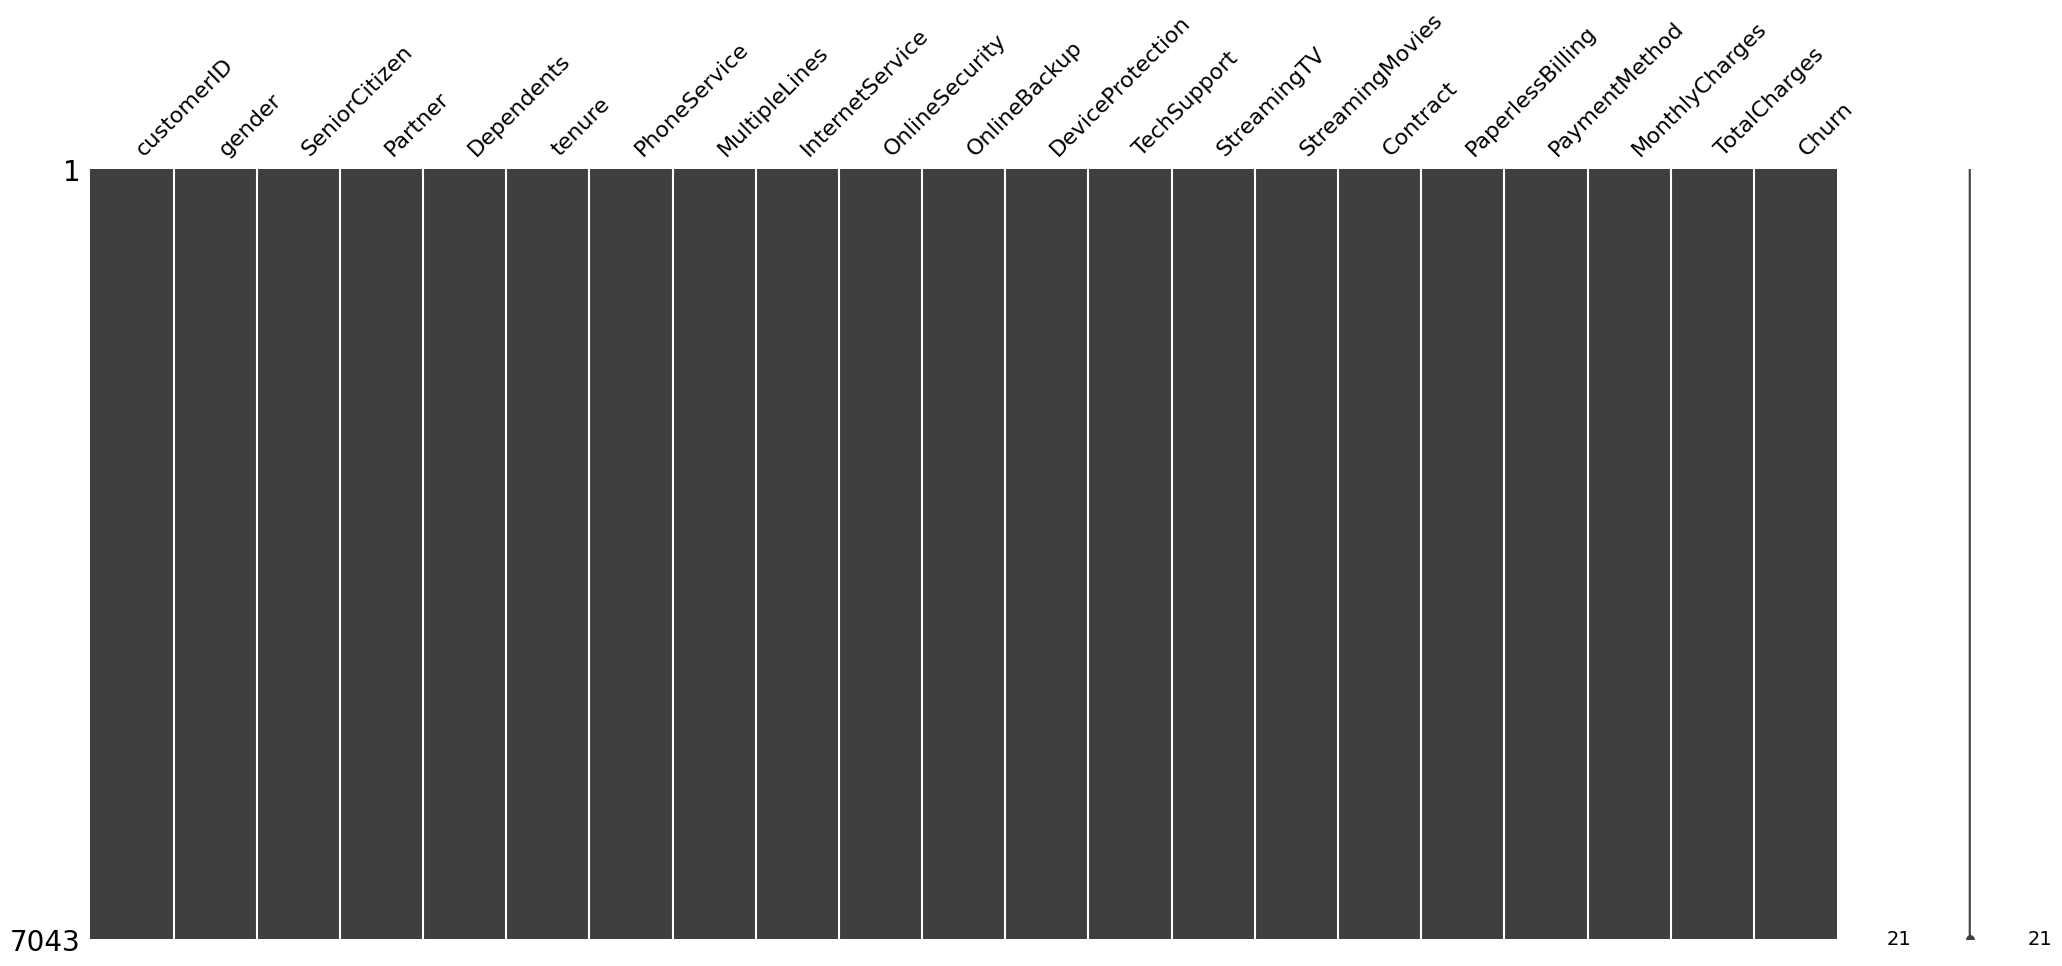

In [63]:
# Investigate missing values in data
msno.matrix(df)

> Using this matrix we can very quickly find the pattern of missingness in the dataset.
* From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.

***

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Data Manipulation </span>
<a id = "8" ></a>

In [64]:
# Remove Customer Id column
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that!

In [65]:
# Invesitgate TotalCharges columns and verify whether all rows have correct number
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* Here we see that the TotalCharges has 11 missing values. Let's check this data.

In [66]:
# Show rows that have problems in TotalCharges
# Is there a relation with tenure column?
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

Let's see if there are any other 0 values in the tenure column.

In [67]:
# Find index of prblematic rows.
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

* There are no additional missing values in the Tenure column.

Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [68]:
# remove problematic rows
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [69]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [70]:
# Map SeniorCitizen Column 0 to "No" and 1 to "Yes"
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
# Describe statistics of numerical columns
# Numerical columns are ['tenure', 'MonthlyCharges', 'TotalCharges']
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


___

<a id = "9" ></a>
# <span style="font-family:serif; font-size:28px;"> 6. Data Visualization </span>
<a id = "datavisualization" ></a>

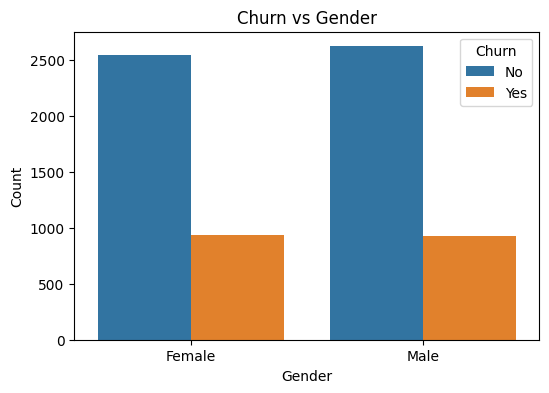

In [72]:
# Is there any relation between churn and gender?
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Churn vs Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

* There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

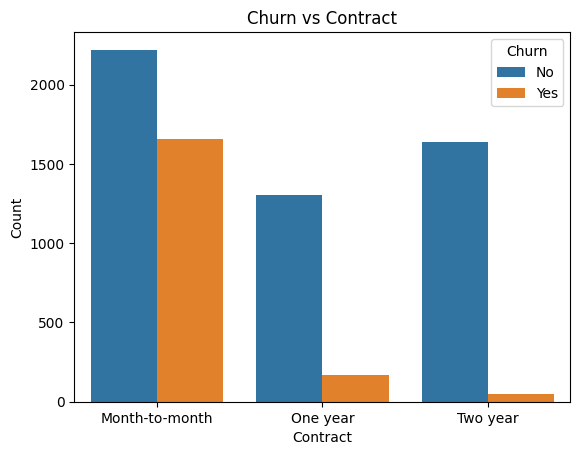

In [73]:
# Is there a relation between Contract and Churn?
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn vs Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

* About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

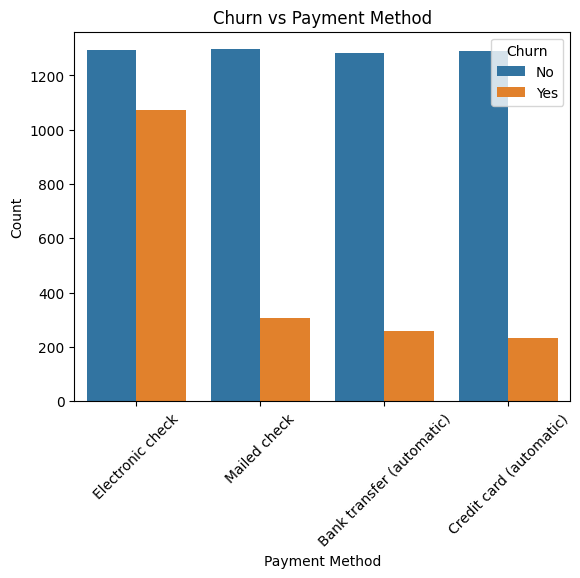

In [74]:
# Is there relation between Payment Method and Churn?
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Churn vs Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* Major customers who moved out were having Electronic Check as Payment Method.
* Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.  

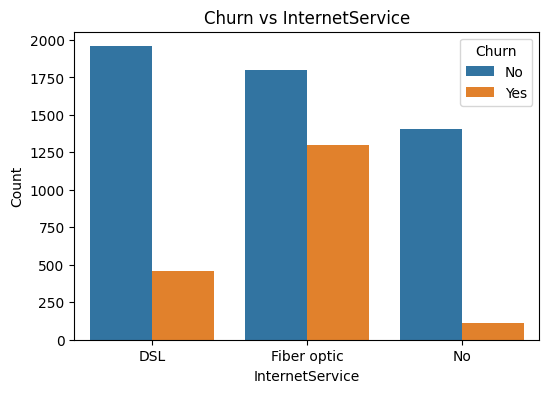

In [75]:
# Is there relation between internet service and churn?
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn vs InternetService')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.show()

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

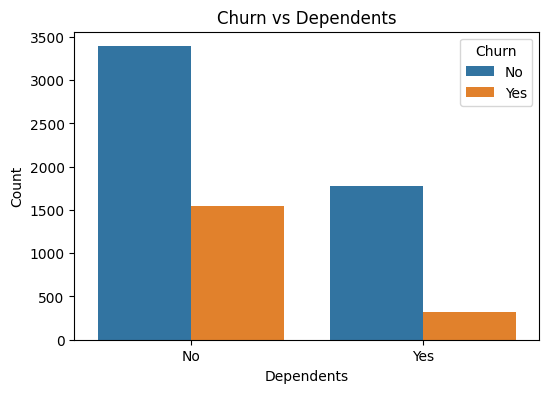

In [76]:
# Is there a relation between Dependants and Churn?
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Dependents', hue='Churn')
plt.title('Churn vs Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

* Customers without dependents are more likely to churn

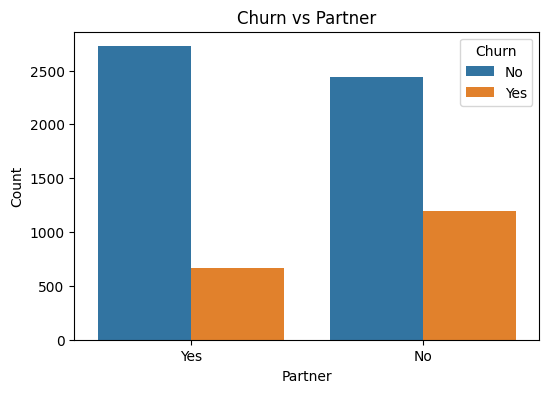

In [77]:
# Is there a relation between having partner and churn?
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Partner', hue='Churn')
plt.title('Churn vs Partner')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

* Customers that doesn't have partners are more likely to churn

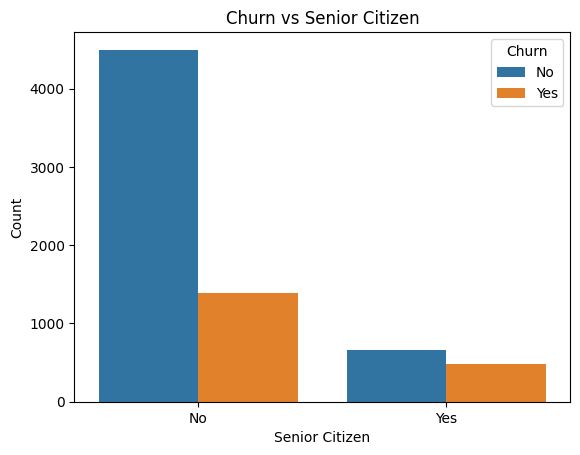

In [78]:
# Is there relation between churn and senior citizen
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Churn vs Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()

* It can be observed that the fraction of senior citizen is very less.
* Most of the senior citizens churn.

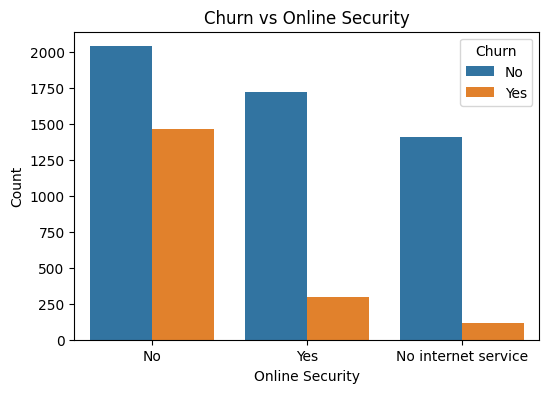

In [79]:
# Is there any relation between churn and security?
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn')
plt.title('Churn vs Online Security')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.show()


* Most customers churn in the absence of online security,

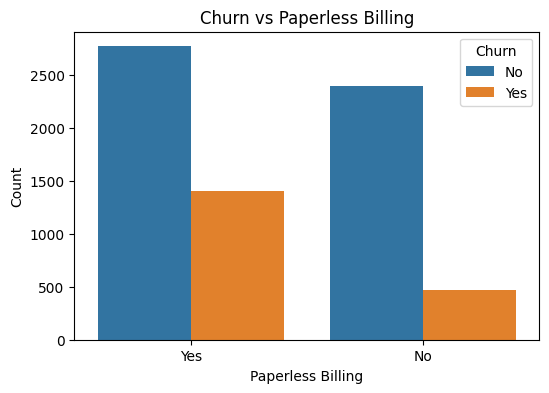

In [80]:
# Is there a relationship between churn and paperless billing?
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='PaperlessBilling', hue='Churn')
plt.title('Churn vs Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.show()


* Customers with Paperless Billing are most likely to churn.

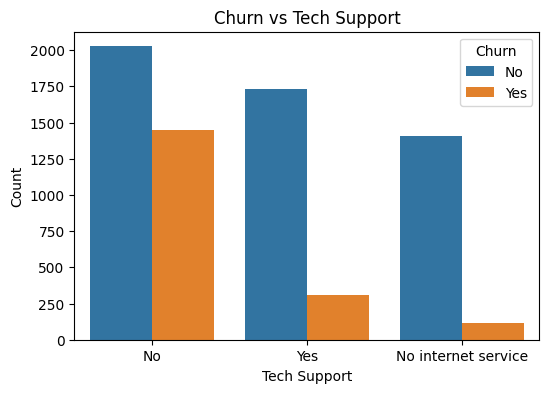

In [81]:
# Is there a relation between churn and techsupport
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title('Churn vs Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()


* Customers with no TechSupport are most likely to migrate to another service provider.

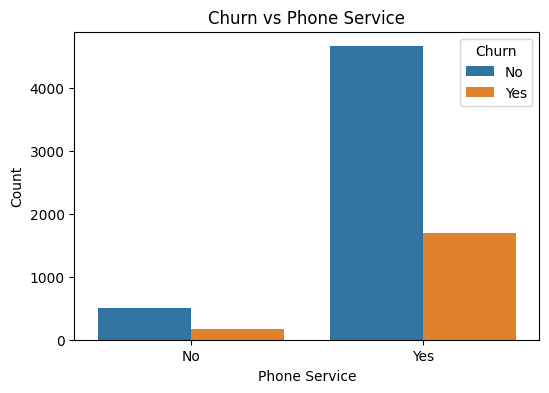

In [82]:
# Is there any relation between churn and phoneservice
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='PhoneService', hue='Churn')
plt.title('Churn vs Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.show()


* Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

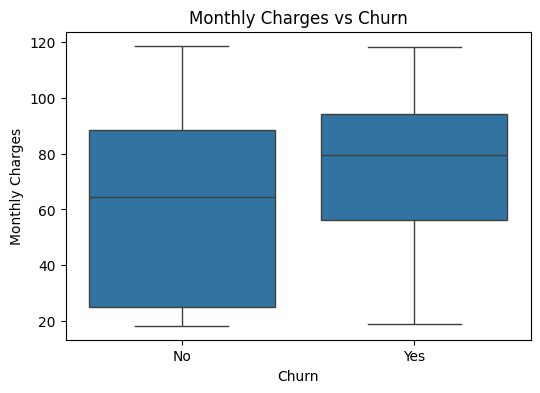

In [83]:
# Investigate the relationship between monthly charges and churn

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


* Customers with higher Monthly Charges are also more likely to churn

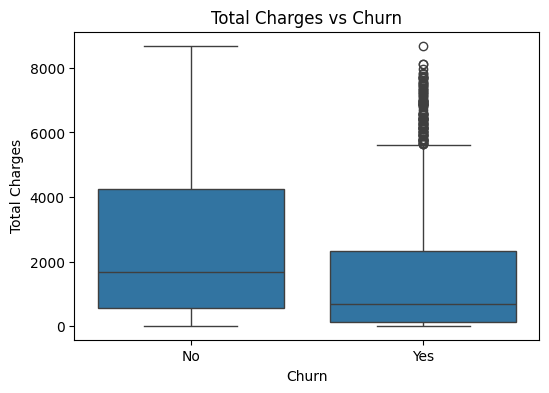

In [84]:
# Investigate relation between totalCharges and Churn
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Total Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()


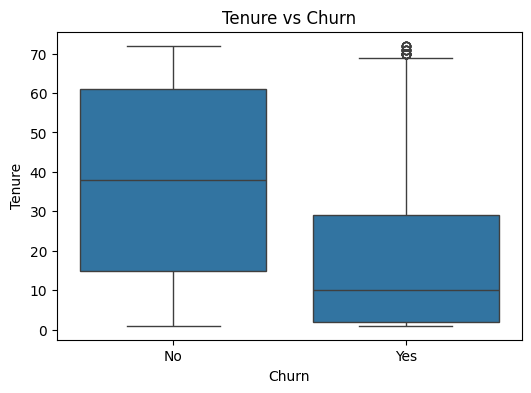

In [85]:
# Investigate relation of tenure and churn
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()


* New customers are more likely to churn

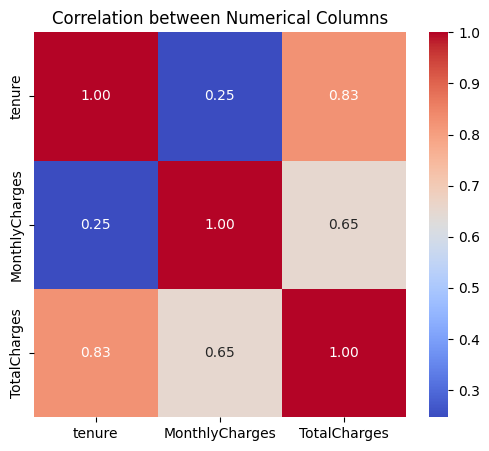

In [86]:
#lets look at correlations:))
df_clean = df[numerical_cols].replace(' ', np.nan).dropna()
df_clean = df_clean.apply(pd.to_numeric, errors='coerce')
corr = df_clean.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Numerical Columns')
plt.show()


___

<a id = "10" ></a>
# <span style="font-family:serif; font-size:28px;"> 7. Data Preprocessing</span>
<a id = "datapreprocessing" ></a>

<a id = "1111" ></a>
#### **Splitting the data into train and test sets**
<a id = "Split" ></a>

In [87]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [88]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [89]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [90]:
x = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [91]:
# Split train, test (0.7, 0.3)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [92]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

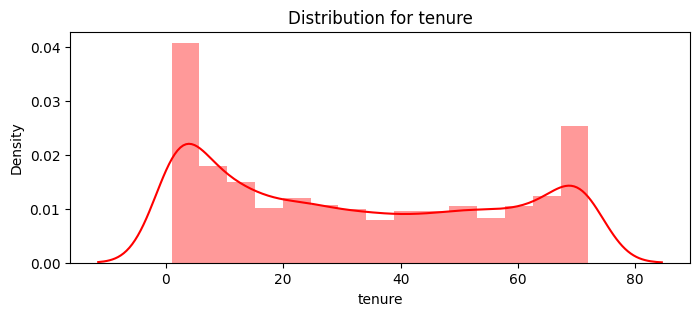

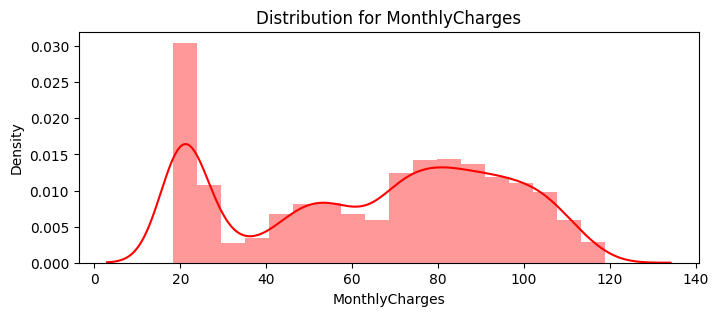

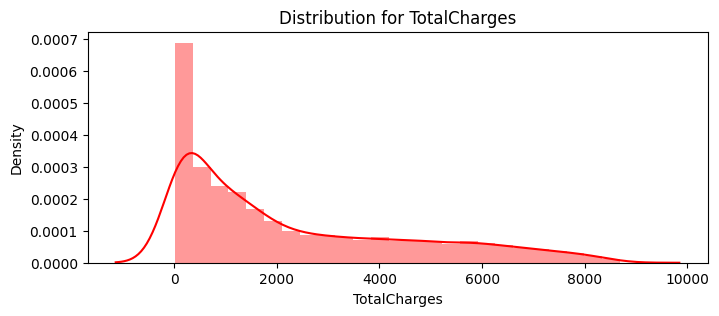

In [93]:
# what do you understand from these plots?
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

In [94]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [54]:
# scale numerical columns?
scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

le = LabelEncoder()
for col in cat_cols_le:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=cat_cols_ohe, drop_first=True)



KeyError: "None of [Index(['PaymentMethod', 'Contract', 'InternetService'], dtype='object')] are in the [columns]"

<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> 8. Machine Learning Model Evaluations and Predictions</span>
<a id = "modelprediction" ></a>

<a id = "101" ></a>
#### <b> KNN</b>
<a id = "knn" ></a>

In [95]:
# Train classifier with KNN
X = df.drop(columns=["Churn"])
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [96]:
# Report appropriate metrics on classification
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7563981042654029
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1549
           1       0.55      0.45      0.49       561

    accuracy                           0.76      2110
   macro avg       0.68      0.66      0.67      2110
weighted avg       0.74      0.76      0.75      2110



<a id = "102" ></a>
#### <b>SVC</b>
<a id = "svc" ></a>

In [97]:
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [98]:
y_pred = svc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7341232227488151
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



<a id = "103" ></a>
#### <b> Random Forest</b>
<a id = "rf" ></a>

In [100]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [101]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7862559241706161
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



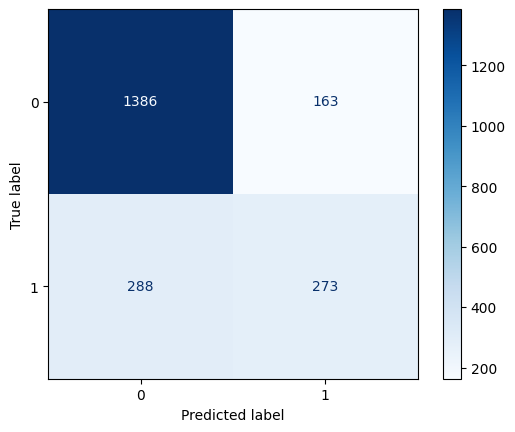

In [105]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.show()


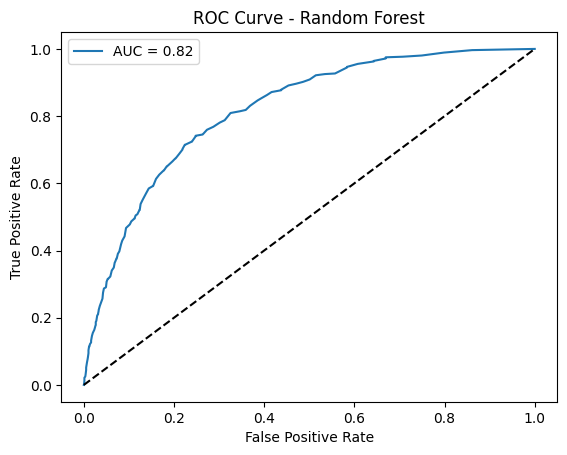

In [106]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr,tpr):.2f}")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

<a id = "104" ></a>
#### <b>Logistic Regression</b>
<a id = "lr" ></a>

In [107]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [108]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7862559241706161
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



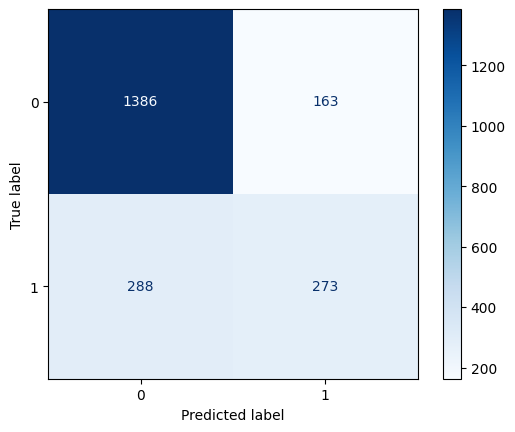

In [110]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.show()

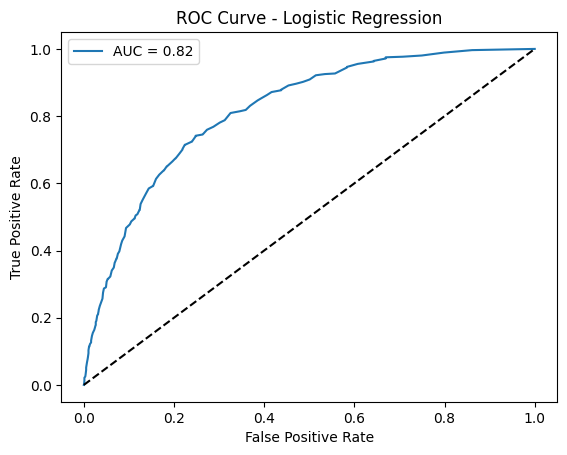

In [111]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr,tpr):.2f}")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

<a id = "105" ></a>
#### **Decision Tree Classifier**
<a id = "dtc" ></a>

In [112]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Decision tree gives very low score.

In [113]:
y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7412322274881517
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1549
           1       0.51      0.52      0.52       561

    accuracy                           0.74      2110
   macro avg       0.67      0.67      0.67      2110
weighted avg       0.74      0.74      0.74      2110



<a id = "106" ></a>
#### **AdaBoost Classifier**
<a id = "ada" ></a>

In [114]:

ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42


In [116]:
y_pred = ada.predict(X_test)
y_proba = ada.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7867298578199052
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1549
           1       0.61      0.55      0.58       561

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110



<a id = "107" ></a>
#### **Gradient Boosting Classifier**
<a id = "gb" ></a>

In [118]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [119]:
y_pred = gb.predict(X_test)
y_proba = gb.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.79478672985782
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.50      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.78      0.79      0.79      2110



<a id = "108" ></a>
#### **Voting Classifier**
<a id = "vc" ></a>
Let's now predict the final model based on the highest majority of voting and check it's score.

In [121]:
voting = VotingClassifier(
    estimators=[
        ("logreg", LogisticRegression(max_iter=1000, random_state=42)),
        ("rf", RandomForestClassifier(random_state=42)),
        ("gb", GradientBoostingClassifier(random_state=42))
    ],
    voting="soft"
)
voting.fit(X_train, y_train)

,estimators,"[('logreg', ...), ('rf', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [122]:
y_pred = voting.predict(X_test)
y_proba = voting.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7990521327014218
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.51      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



From the confusion matrix we can see that:
There are total 1400+149=1549 actual non-churn values and the algorithm predicts 1400 of them as non churn and 149 of them as churn.
While there are 237+324=561 actual churn values and the algorithm predicts 237 of them as non churn values and 324 of them as churn values.

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.

<span style="color:crimson;font-family:serif; font-size:20px;">  Please upvote if you liked the kernel! 😀
    <p style="color:royalblue;font-family:serif; font-size:20px;">KEEP KAGGLING!</p>
</span>